In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_excel('C:/Users/georg/Downloads/Задание_МлАналитик.xlsx', sheet_name= 'data')

### Общая информация

In [5]:
data.head()

,yyyy_mm,id_клиента,Объем
0,2023-11-01,id00001,7.78
1,2023-09-01,id00002,1.08
2,2022-02-01,id00003,39.19
3,2023-08-01,id00004,1.17
4,2022-09-01,id00005,2.07


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367425 entries, 0 to 367424
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   yyyy_mm     367425 non-null  datetime64[ns]
 1   id_клиента  367425 non-null  object        
 2   Объем       367425 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.4+ MB


### Предобработка данных

#### Поиск дубликатов

In [9]:
display(f'Дубликатов найдено - {data.duplicated().sum()} штук')

'Дубликатов найдено - 0 штук'

#### Поиск пропусков

In [11]:
data.isnull().sum()

yyyy_mm       0
id_клиента    0
Объем         0
dtype: int64

#### Переименую столбцы

In [13]:
data = data.rename(columns={'yyyy_mm': 'data','id_клиента':'id'})

#### Выделю столбцы с годом и месцем и общей даты

In [15]:
data['year'] = pd.DatetimeIndex(data['data']).year
data['month'] = pd.DatetimeIndex(data['data']).month

#### В столбце id уберу упоминание про id, оно есть уже в заголовке и поменяю тип данных на числовой

In [17]:
data['id'] = data['id'].str[2:]
data['id'] = data['id'].astype('int')

### Дата начала и конца эксперимента

In [19]:
data['data'].min()

Timestamp('2022-01-01 00:00:00')

In [20]:
data['data'].max()

Timestamp('2024-03-01 00:00:00')

### 1.Анализ данных

1. Распределить клиентскую базу на сегменты, используя методологию, описанную  задании.

Из полученной таблицы сформирую сводную таблицу по активности клиентов

In [24]:
y = data.pivot_table(index = 'month',columns='id', values = 'Объем', aggfunc='sum')

In [25]:
y

id,1,2,3,4,5,6,7,8,9,10,...,60053,60054,60055,60056,60057,60058,60059,60060,60061,60062
month,,,,,,,,,,,,,,,,,,,,,
1,29.99,2.51,61.78,2.98,1.29,NaN,NaN,NaN,0.33,3.45,...,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN
2,36.50,4.58,91.85,8.43,3.55,NaN,0.55,NaN,0.40,1.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.85,4.14,91.42,4.96,1.21,0.13,1.03,0.44,NaN,4.61,...,NaN,NaN,NaN,NaN,NaN,NaN,1.28,0.84,NaN,NaN
4,16.35,5.12,83.34,5.18,0.20,0.26,0.37,NaN,0.09,3.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,14.83,4.57,50.40,5.14,0.97,NaN,NaN,NaN,NaN,2.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.46,NaN
6,13.77,5.24,79.03,2.61,3.04,0.02,NaN,0.24,NaN,3.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20.31,4.94,57.47,4.97,NaN,NaN,NaN,0.42,NaN,4.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,13.55,2.61,75.02,4.05,5.89,NaN,0.55,NaN,NaN,4.58,...,NaN,NaN,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.03,3.94,65.32,8.20,7.96,NaN,1.43,NaN,NaN,3.84,...,NaN,0.31,NaN,NaN,0.18,NaN,NaN,NaN,NaN,NaN


In [26]:
y = y.fillna(0)

In [27]:
new_data = y.T

In [28]:
new_data.columns.name = None

new_data.reset_index().drop('id', axis = 1,inplace=True)

In [29]:
new_data

,1,2,3,4,5,6,7,8,9,10,11,12
id,,,,,,,,,,,,
1,29.99,36.50,25.85,16.35,14.83,13.77,20.31,13.55,10.03,9.63,13.22,18.69
2,2.51,4.58,4.14,5.12,4.57,5.24,4.94,2.61,3.94,2.46,4.05,5.05
3,61.78,91.85,91.42,83.34,50.40,79.03,57.47,75.02,65.32,55.52,85.38,73.60
4,2.98,8.43,4.96,5.18,5.14,2.61,4.97,4.05,8.20,3.07,6.27,3.02
5,1.29,3.55,1.21,0.20,0.97,3.04,0.00,5.89,7.96,2.62,0.82,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
60058,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00
60059,0.00,0.00,1.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
60060,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [30]:
new_data[new_data>0] = 'X'
new_data[new_data==0] = 'O'

In [31]:
new_data['Загрузка'] = new_data[5].str.cat(new_data[6], sep ="")
new_data['Загрузка_1'] = new_data[6].str.cat(new_data[7], sep ="")
new_data['Загрузка_2'] = new_data['Загрузка_1'].str.cat(new_data['Загрузка'], sep ="")
new_data['Загрузка_3'] = new_data['Загрузка_2'].str.cat(new_data[9], sep ="")

In [32]:
new_data=new_data.reset_index().drop([5,6,7,8,9,10,11,12,1,2,3,4,'Загрузка','Загрузка_2','Загрузка_1'], axis=1)
new_data

,id,Загрузка_3
0,1,XXXXX
1,2,XXXXX
2,3,XXXXX
3,4,XXXXX
4,5,XOXXX
...,...,...
60057,60058,OOOOO
60058,60059,OOOOO
60059,60060,OOOOO
60060,60061,OOXOO


In [33]:
def alert(row):
    if row['Загрузка_3'] == 'XXXXX' or row['Загрузка_3'] =='OXXXX' or  \
    row['Загрузка_3'] =='XOXXX' or row['Загрузка_3'] =='XXOXX' or row['Загрузка_3'] =='XXXOX' :
       return 'Постоянные'
    if row['Загрузка_3'] == 'OOXXX' or row['Загрузка_3'] =='OXOXX' or  \
    row['Загрузка_3'] =='OXXOX' or row['Загрузка_3'] =='XOXOX' or row['Загрузка_3'] =='XXOOX' or \
    row['Загрузка_3'] == 'OOOXX' or row['Загрузка_3'] =='XOOOX' or  row['Загрузка_3'] =='OXOOX' or \
    row['Загрузка_3'] =='OOXOX' or row['Загрузка_3'] =='XOOXX' or row['Загрузка_3'] == 'OXXXO' or row['Загрузка_3'] =='XOXXO' or  \
    row['Загрузка_3'] =='XXOXO' or row['Загрузка_3'] =='OOXXO' or row['Загрузка_3'] =='XOOXO' or \
    row['Загрузка_3'] == 'OXOXO':
        return 'Нерегулярные'
    if row['Загрузка_3'] == 'OOOOX' :
        return 'Новые/возвращенные'
    if row['Загрузка_3'] == 'XXXXO':
        return 'Уходящие постоянные'   
    if row['Загрузка_3'] == 'OOOXO' or row['Загрузка_3'] == 'OOXOO':
        return 'Разовые'   
    if row['Загрузка_3'] == 'XXXOO' or row['Загрузка_3'] =='XOXOO' or  row['Загрузка_3'] =='OXXOO':
        return 'Уходящие' 
    if row['Загрузка_3'] == 'XXOOO' or row['Загрузка_3'] == 'OXOOO':
        return 'Отток'  
    if row['Загрузка_3'] == 'XOOOO':
        return 'Потерянные'  
    else:
        return 'Неактивный'

new_data['category'] = new_data.apply(alert, axis=1)

In [34]:
new_data

,id,Загрузка_3,category
0,1,XXXXX,Постоянные
1,2,XXXXX,Постоянные
2,3,XXXXX,Постоянные
3,4,XXXXX,Постоянные
4,5,XOXXX,Постоянные
...,...,...,...
60057,60058,OOOOO,Неактивный
60058,60059,OOOOO,Неактивный
60059,60060,OOOOO,Неактивный
60060,60061,OOXOO,Разовые


### Объеденю таблицы

In [36]:
data = data.merge(new_data, on ='id', how = 'left')

### 2. Распределить клиентскую базу на сегменты, используя методологию, описанную  в задании.

In [37]:
data.head()

,data,id,Объем,year,month,Загрузка_3,category
0,2023-11-01,1,7.78,2023,11,XXXXX,Постоянные
1,2023-09-01,2,1.08,2023,9,XXXXX,Постоянные
2,2022-02-01,3,39.19,2022,2,XXXXX,Постоянные
3,2023-08-01,4,1.17,2023,8,XXXXX,Постоянные
4,2022-09-01,5,2.07,2022,9,XOXXX,Постоянные


In [38]:
data.isnull().sum()

data          0
id            0
Объем         0
year          0
month         0
Загрузка_3    0
category      0
dtype: int64

In [39]:
data_1 = data.query('year ==2023 and month>=5 and month<=9 ')

In [40]:
data_1.head()

,data,id,Объем,year,month,Загрузка_3,category
1,2023-09-01,2,1.08,2023,9,XXXXX,Постоянные
3,2023-08-01,4,1.17,2023,8,XXXXX,Постоянные
5,2023-06-01,6,0.02,2023,6,XOOXO,Нерегулярные
12,2023-09-01,13,23.20,2023,9,XXXXX,Постоянные
14,2023-07-01,15,6.38,2023,7,XXXXX,Постоянные


In [164]:
data_1.to_excel('data_1.xlsx')

In [42]:
data_1['data'].max()

Timestamp('2023-09-01 00:00:00')

In [43]:
data_1['data'].min()

Timestamp('2023-05-01 00:00:00')

### На основе прошедших периодов спрогнозировать количество клиентов и объем в группах Новые/Возвращенные, Постоянные, Нерегулярные

для расчета мне нужен переиод до мая 2023 года и группы Новые/Возвращенные, Постоянные, Нерегулярные 

In [46]:
data

,data,id,Объем,year,month,Загрузка_3,category
0,2023-11-01,1,7.78,2023,11,XXXXX,Постоянные
1,2023-09-01,2,1.08,2023,9,XXXXX,Постоянные
2,2022-02-01,3,39.19,2022,2,XXXXX,Постоянные
3,2023-08-01,4,1.17,2023,8,XXXXX,Постоянные
4,2022-09-01,5,2.07,2022,9,XOXXX,Постоянные
...,...,...,...,...,...,...,...
367420,2024-01-01,5028,1.17,2024,1,XXXXX,Постоянные
367421,2023-09-01,10204,1.51,2023,9,OOOOX,Новые/возвращенные
367422,2023-08-01,22943,2.16,2023,8,XXXXX,Постоянные
367423,2022-04-01,48123,0.15,2022,4,XOXXO,Нерегулярные


По услвоию задания ограничю датафрейм 

In [48]:
data_2 = data.query("data >= '2022-01-01' \
                       and data < '2023-05-01'")
 

In [49]:
#data_2['data'].max()

In [50]:
#data_2['data'].min()

In [51]:
#data_2['category'].unique()

In [52]:
data_2 = data_2.query("category =='Новые/возвращенные' or category =='Постоянные' or category =='Нерегулярные'")

In [53]:
data_2

,data,id,Объем,year,month,Загрузка_3,category
2,2022-02-01,3,39.19,2022,2,XXXXX,Постоянные
4,2022-09-01,5,2.07,2022,9,XOXXX,Постоянные
6,2022-03-01,7,1.03,2022,3,OOOOX,Новые/возвращенные
7,2022-03-01,8,0.44,2022,3,XXOXO,Нерегулярные
9,2022-07-01,10,1.87,2022,7,XXXXX,Постоянные
...,...,...,...,...,...,...,...
367410,2022-04-01,26665,0.13,2022,4,XXXXX,Постоянные
367412,2022-11-01,6739,1.36,2022,11,XOXXX,Постоянные
367414,2022-01-01,2660,0.20,2022,1,XXXXX,Постоянные
367423,2022-04-01,48123,0.15,2022,4,XOXXO,Нерегулярные


In [54]:
#data_2['category'].unique()

### 3. Прогонозирование по категориям и объему (за прошедший период)

#### 3.1 Прогнозирование по объему

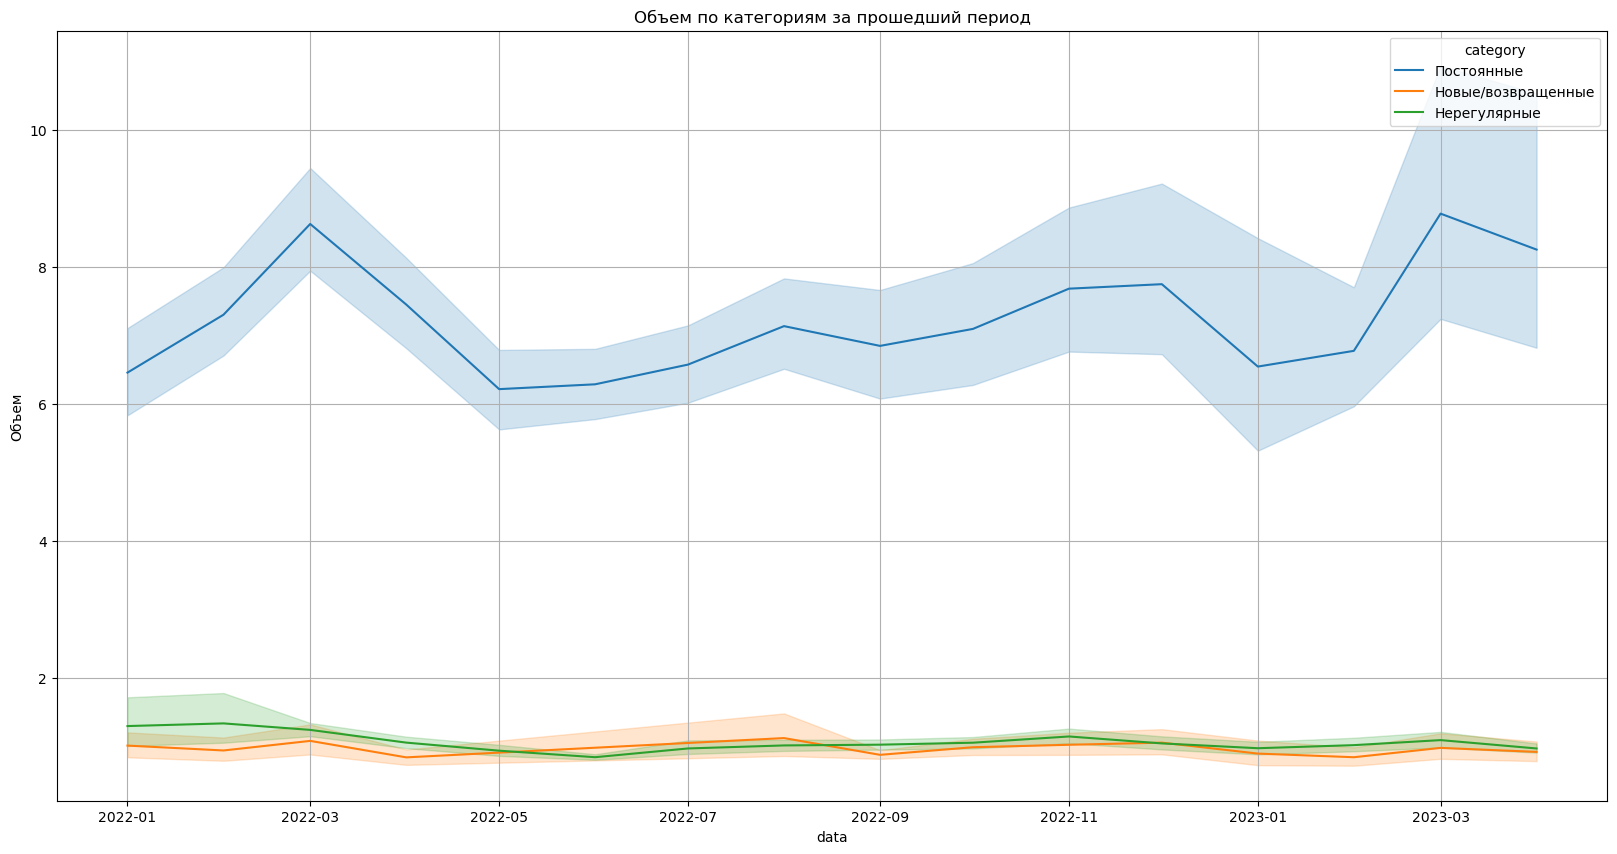

In [56]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=data_2, x="data", y="Объем", hue='category')
plt.title('Объем по категориям за прошедший период')
plt.grid()
plt.show()

Рассмотрю каждую категорию отдельно a) сезонности бизнеса и объему продаж

In [58]:
data_21 = data_2.query("category=='Постоянные'")
data_22 = data_2.query("category=='Новые/возвращенные'")
data_23 = data_2.query("category=='Нерегулярные'")

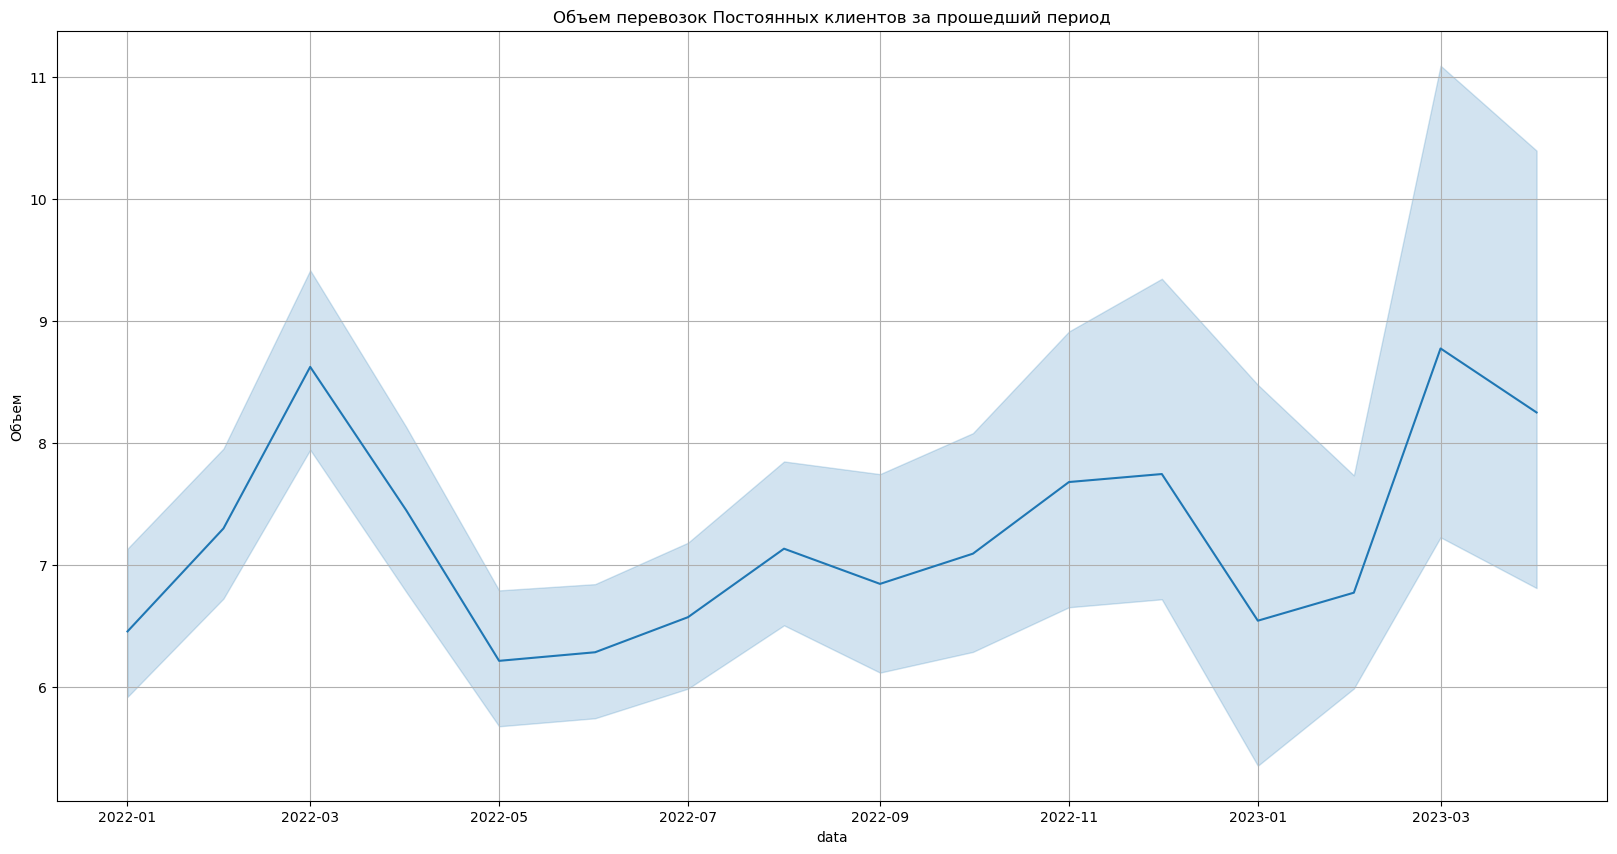

In [59]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=data_21, x="data", y="Объем")
plt.title('Объем перевозок Постоянных клиентов за прошедший период')
plt.grid()
plt.show()

Постоянные клиенты - сезонность -
от января по март 2022 года виден рост кол-ва продаж после идет спад до мая
с мая 22 года виден постенный рост до декабря и тут видно сезон заканчивается  после снова резкий рост по сравнению с предыдущей волной
судя по тенденции после апреля 2023 года с мая месяца будет очередной рост объемов , небольшой спад виден на сенятбре но может он только в 22 году был или так постоянно трудно сказать так как нет более старых данных
У постоянных клиентов можно выделить два сезона 1й с резким ростом с января по май и 2й более плавный с мая месяца по декабрь

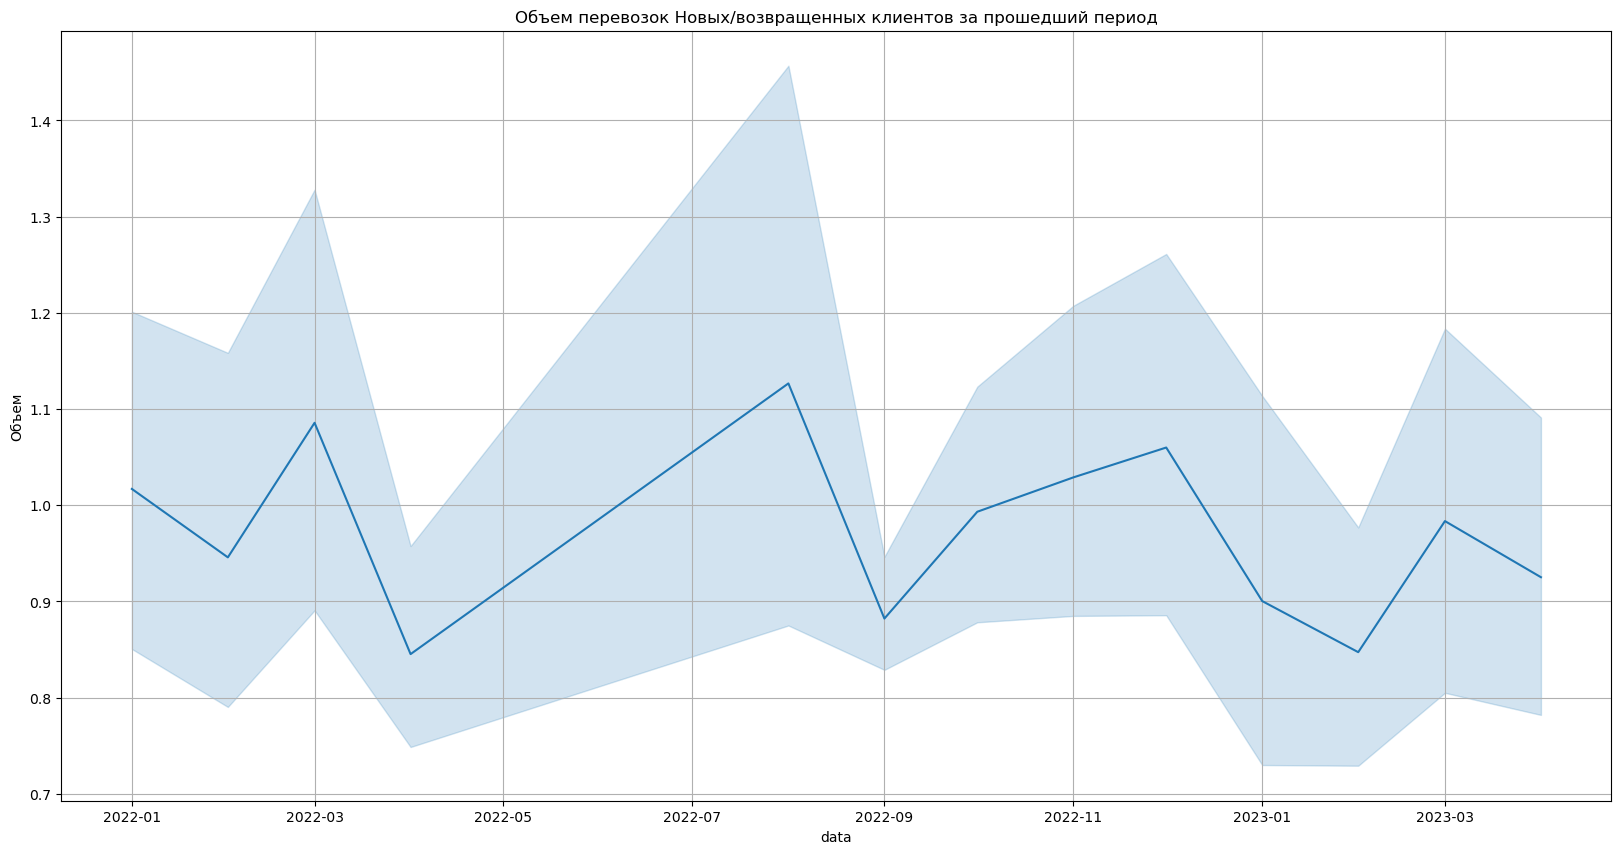

In [61]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=data_22, x="data", y="Объем")
plt.title('Объем перевозок Новых/возвращенных клиентов за прошедший период')
plt.grid()
plt.show()

Новые возвращенные клиенты - сезонность объемов - 
по графику можно выделить скачки по объемам с февраля месяца до марта, затем с апреля до августа, с сенятбря по декабрь и дальше видно повторение этой же тенденции с уменьшением объемов
так же трудно точно сказать что точно будет но судя по тенденции возможно незначительный спад с апреля месяца с теме же сезонами активности и пиком в августе месяце

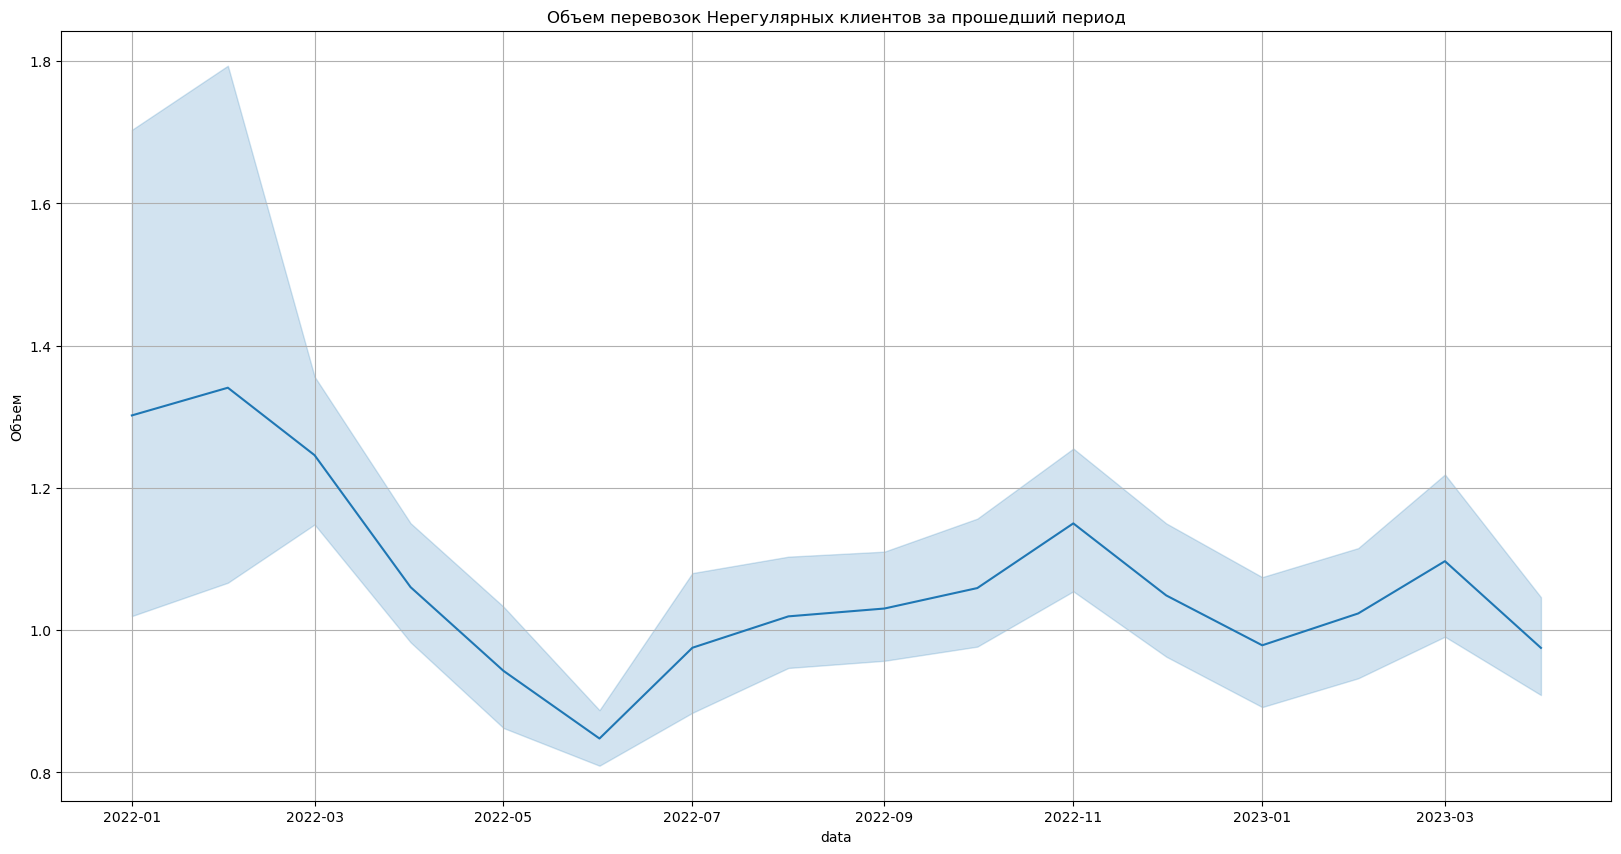

In [63]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=data_23, x="data", y="Объем")
plt.title('Объем перевозок Нерегулярных клиентов за прошедший период')
plt.grid()
plt.show()

Нерегулярные клиенты - сезонность
по графику видны два сезона активности
1й не известно когда начался н кончился в феврале месяце и делаее спад
2й сезон - рост с июня месяца по ноябрь 
если судить по данной зависимости то с апреля 2023 года будет спад объемов до июня и далее рост со снижением общих объемов

### 3.2 Прогонозирование по количеству клиентов

In [66]:
data_21.head()

,data,id,Объем,year,month,Загрузка_3,category
2,2022-02-01,3,39.19,2022,2,XXXXX,Постоянные
4,2022-09-01,5,2.07,2022,9,XOXXX,Постоянные
9,2022-07-01,10,1.87,2022,7,XXXXX,Постоянные
11,2022-12-01,12,0.24,2022,12,XXXXX,Постоянные
16,2022-03-01,17,10.00,2022,3,XXXXX,Постоянные


In [67]:
data_count_id_21 = data_21.pivot_table(index= ['category','data'], values='id', aggfunc='count')

In [68]:
data_count_id_21

id
category   data            
Постоянные 2022-01-01  7733
           2022-02-01  8260
           2022-03-01  8625
           2022-04-01  8684
           2022-05-01  8803
           2022-06-01  9534
           2022-07-01  8856
           2022-08-01  8883
           2022-09-01  9790
           2022-10-01  8878
           2022-11-01  8950
           2022-12-01  8776
           2023-01-01  8066
           2023-02-01  8457
           2023-03-01  9010
           2023-04-01  8822

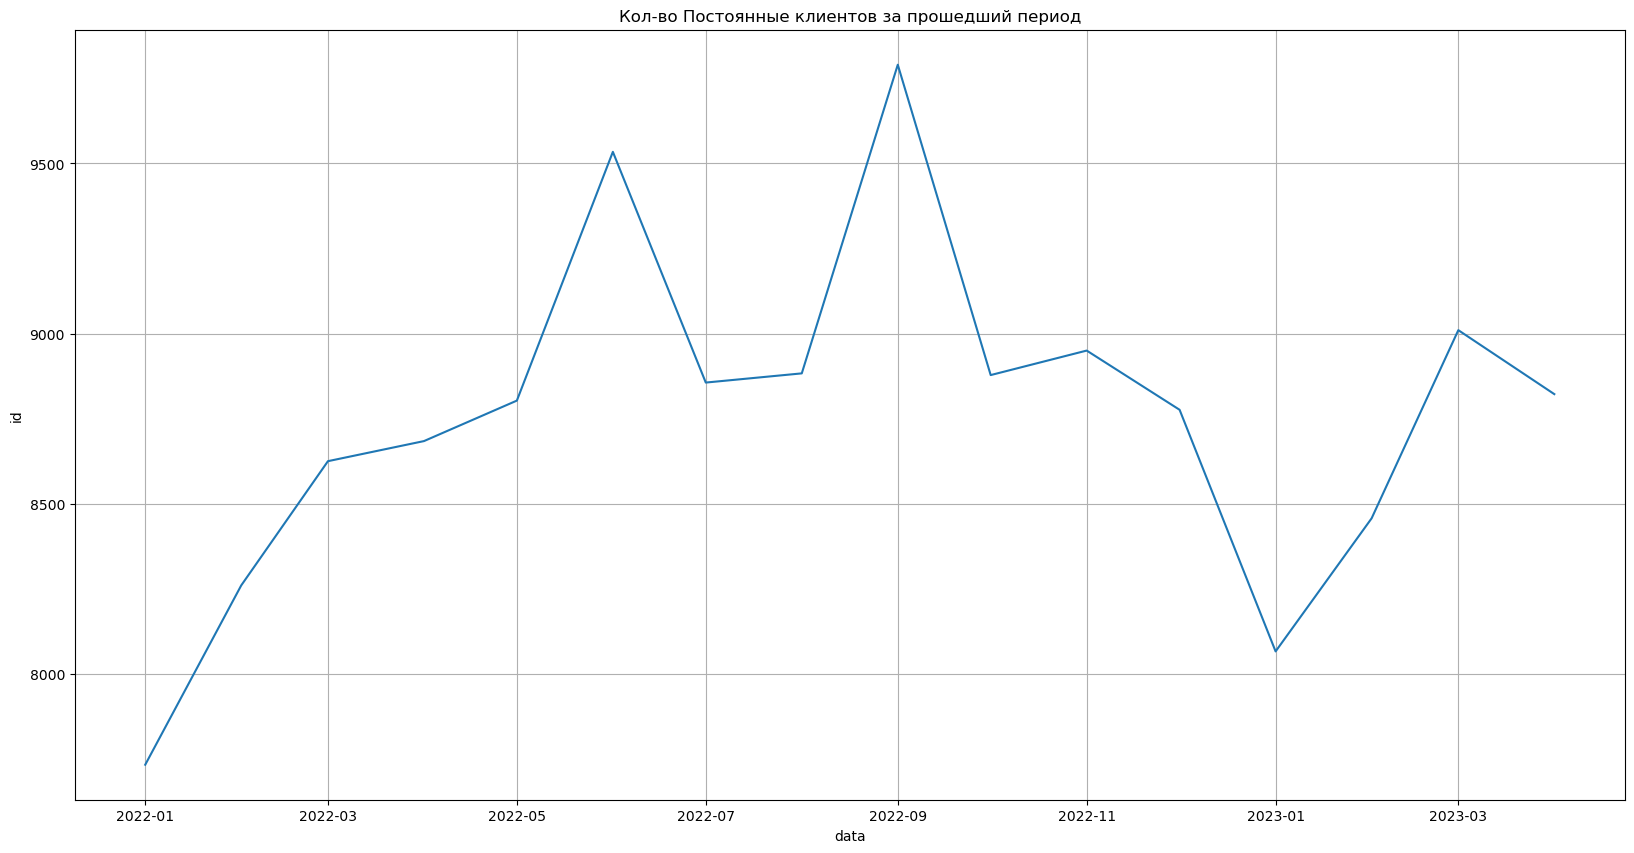

In [69]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=data_count_id_21, x="data", y="id")
plt.title('Кол-во Постоянные клиентов за прошедший период')
plt.grid()
plt.show()

Кол-во клиентов по постоянным - 
по сезонности - видно два набора клиентов - с января 2022 года по июнь далее спад незначительный до июля и с августа скачок до сентября далее идет спад актиности до января
судя по графику можно предположитьчто с апреля 2023 года будет рост активности скачками в тех же сезоннах с мая и августа 

In [71]:
data_count_id_22 = data_22.pivot_table(index= ['category','data'], values='id', aggfunc='count')
data_count_id_22

id
category           data            
Новые/возвращенные 2022-01-01   301
                   2022-02-01   350
                   2022-03-01   392
                   2022-04-01   306
                   2022-08-01   401
                   2022-09-01  2335
                   2022-10-01   486
                   2022-11-01   450
                   2022-12-01   415
                   2023-01-01   274
                   2023-02-01   287
                   2023-03-01   355
                   2023-04-01   306

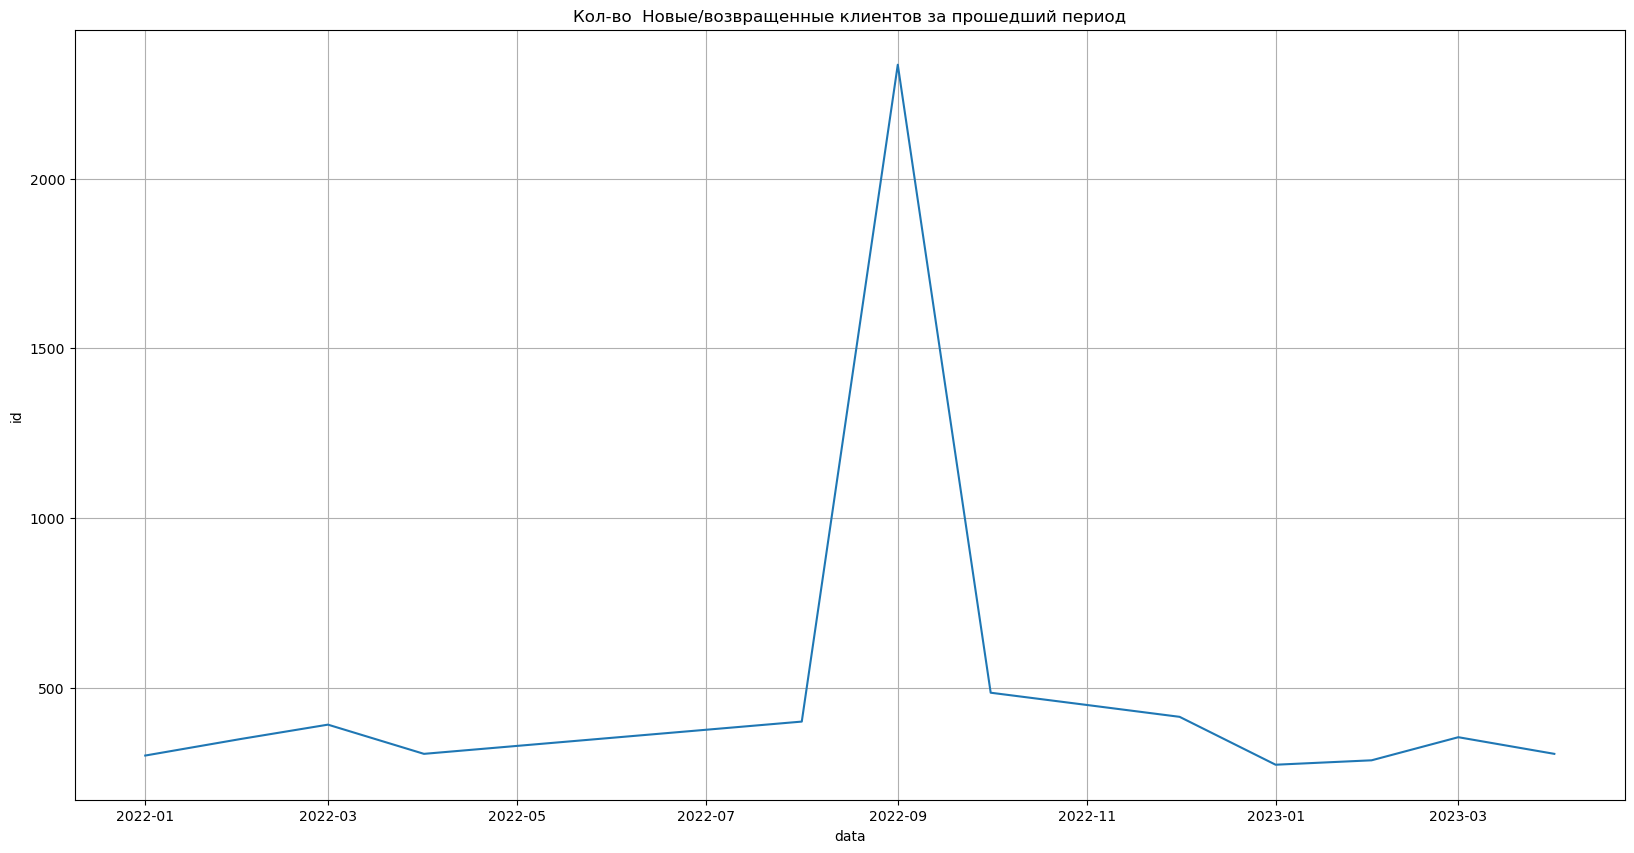

In [72]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=data_count_id_22, x="data", y="id")
plt.title('Кол-во  Новые/возвращенные клиентов за прошедший период')
plt.grid()
plt.show()

По новым возвращенным клиентам - 
в сентябре виден всплеск кол-ва клиентов это скорей всего какое то сезонное предложение и трудно сказать будет ли повторение подобно в следующием году
по общей картиене видно с января небольшой набор клиентов со спадом в апреле и ростом тем же до августа месяца после октября идет спад
судя по тенденции с апреля 2023 года будетнебольшой спад в апреле и постенный рост до августа месяца и псоле постенный спад до января

In [74]:
data_count_id_23 = data_23.pivot_table(index= ['category','data'], values='id', aggfunc='count')
data_count_id_23

id
category     data            
Нерегулярные 2022-01-01  1511
             2022-02-01  1739
             2022-03-01  2002
             2022-04-01  1863
             2022-05-01  1566
             2022-06-01  3852
             2022-07-01  1619
             2022-08-01  1796
             2022-09-01  2075
             2022-10-01  1748
             2022-11-01  1781
             2022-12-01  1716
             2023-01-01  1226
             2023-02-01  1507
             2023-03-01  1742
             2023-04-01  1633

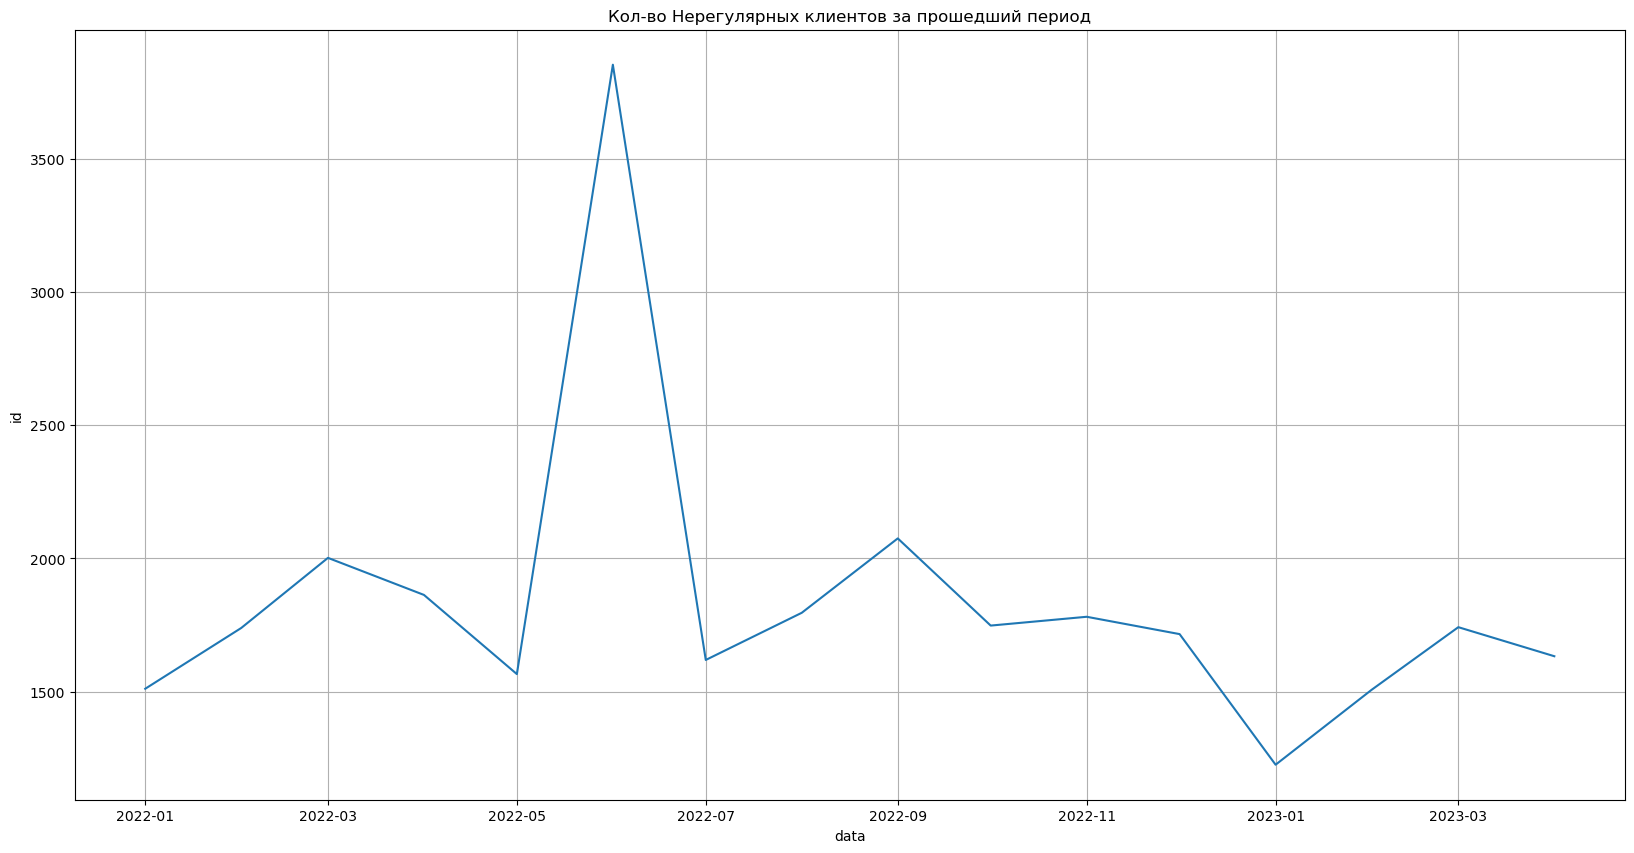

In [75]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=data_count_id_23, x="data", y="id")
plt.title('Кол-во Нерегулярных клиентов за прошедший период')
plt.grid()
plt.show()


Нерегулярные клиенты -
по сезонности виден всплеск в июне он очень подозрителен и учитывать его  не стоит 
что касается остального то с января по март виден рост после спад до мая
далее и июля по сенятбрь и далее постенный спад до января месяца
с апреля 2023 возможно повториться данная тенденция  а судя по тому что март в 2022 и 2023 пошел на убыль то и возможно дальнейшее занижение и соответственно рост с июля по сентябрь

### 4.б) сегмент «Новые/возвращенные» будет расти на +5% по количеству клиентов каждый месяц, начиная с 2024-04.

In [78]:
data_count_id_22

id
category           data            
Новые/возвращенные 2022-01-01   301
                   2022-02-01   350
                   2022-03-01   392
                   2022-04-01   306
                   2022-08-01   401
                   2022-09-01  2335
                   2022-10-01   486
                   2022-11-01   450
                   2022-12-01   415
                   2023-01-01   274
                   2023-02-01   287
                   2023-03-01   355
                   2023-04-01   306

Если все оставить как есть то проста не будет, наоборот виден спад в клиентах 
в январе 2022 года было 301 человек в 2023 году того же месяца 274, в ферале 22 года 350 в 23 гооду февраля уже 287, март 22 - 392 , 23 года 355  а если судить по  тенденции по кол-ву клиентов с января наоборот идет рост активности только со снижением 
хотя это все преждевременно так как судить по оному году достаточно трудно и было бы правильнее расмотреть более длительный период

In [80]:
data_1.head()

,data,id,Объем,year,month,Загрузка_3,category
1,2023-09-01,2,1.08,2023,9,XXXXX,Постоянные
3,2023-08-01,4,1.17,2023,8,XXXXX,Постоянные
5,2023-06-01,6,0.02,2023,6,XOOXO,Нерегулярные
12,2023-09-01,13,23.20,2023,9,XXXXX,Постоянные
14,2023-07-01,15,6.38,2023,7,XXXXX,Постоянные


### Доля объема на одного пользователя в зависимости от категории

In [86]:
data_1234 = data_1.pivot_table(index=['month', 'category'], values='Объем', aggfunc='sum')

In [88]:
data_1235 = data_1.pivot_table(index=['month', 'category'], values='id', aggfunc='count')

In [90]:
data_1234 = data_1234.merge(data_1235, on = ['month','category'])

In [170]:
data_1234['%_on_id'] = data_1234['Объем'] /data_1234['id'] 


In [172]:
data_1234

Объем    id   %_on_id
month category                                     
5     Нерегулярные          1469.57  1507  0.975163
      Постоянные           75905.24  9067  8.371594
      Разовые               1589.05  1813  0.876475
      Уходящие               414.01   439  0.943075
      Уходящие постоянные    913.68   662  1.380181
6     Нерегулярные          3276.67  3421  0.957811
      Постоянные           75932.22  9556  7.946026
      Уходящие постоянные    856.46   649  1.319661
7     Нерегулярные          1776.45  1579  1.125047
      Отток                 1617.09  1807  0.894903
      Постоянные           73837.84  8835  8.357424
      Уходящие               380.17   426  0.892418
      Уходящие постоянные    762.85   631  1.208954
8     Неактивный            1555.36  1682  0.924709
      Нерегулярные          2085.49  1698  1.228204
      Новые/возвращенные     657.50   473  1.390063
      Отток                  262.49   294  0.892823
      Постоянные           84823.28  8840  9.595394
      Разовые                178.37   213  0.837418
      Уходящие               169.01   163  1.036871
      Уходящие постоянные    430.05   382  1.125785
9     Нерегулярные          2511.00  2008  1.250498
      Новые/возвращенные    2678.14  2331  1.148923
      Постоянные           80176.10  9365  8.561249

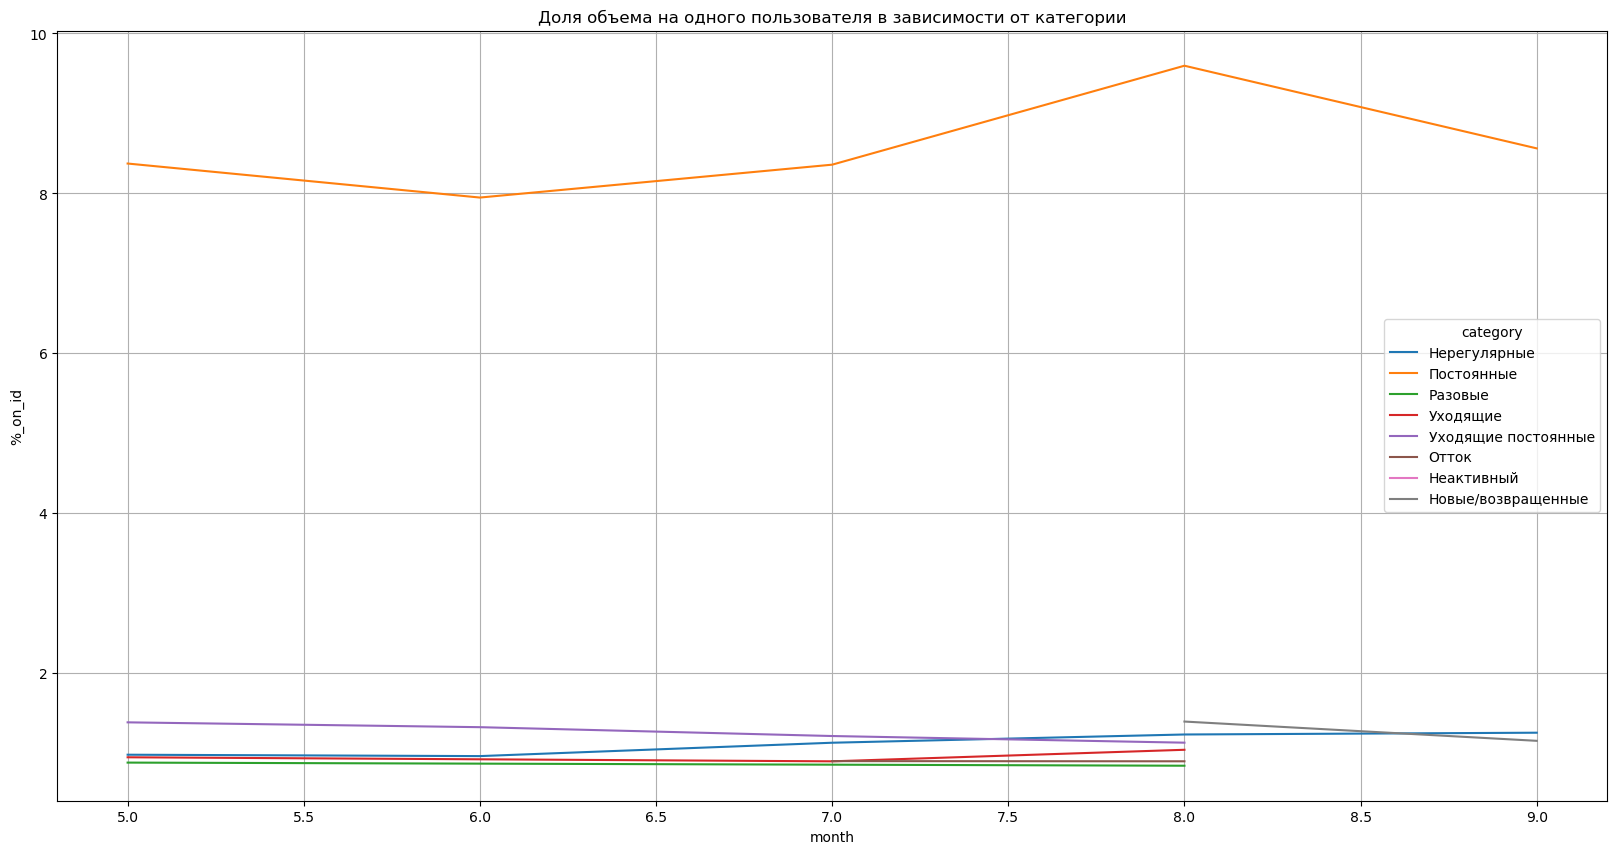

In [162]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=data_1234, x="month", y="%_on_id", hue='category')
plt.title('Доля объема на одного пользователя в зависимости от категории')
plt.grid()
plt.show()

Вывод - 
 В соответствии с заданием - 
 1. Распределить клиентскую базу на сегменты, используя методологию, описанную в задании - клиентская база представлена в п. 2
 2. 2. Отобразить жизненный цикл клиента (все возможные пути миграции клиента из сегмента в сегмент) в виде блок-схемы. (новые -> разовые -> нерегулярные…) - высылаю отдельным файлом MS Visio
 3.  Предложить способ визуализации миграции всей клиентской базы по  сегментам период к периоду - высылаю отдельным файлом Power BI, в нем лучше видна визуализация по заданию.
 4.  На основе прошедших периодов спрогнозировать количество клиентов и объем в группах Новые/Возвращенные, Постоянные, Нерегулярные при условиях:
   a) сезонности бизнеса - вариант решения представлен в п.3.1, 3.2 
   б) сегмент «Новые/возвращенные» будет расти на +5% по количеству клиентов каждый месяц, начиная с 2024-04 - вариант решения представлен в п.4:
   Виден спад в клиентах в январе 2022 года было 301 человек в 2023 году того же месяца 274, в ферале 22 года 350 в 23 гооду февраля уже 287, март 22 - 392 , 23 года 355 а если судить по тенденции по кол-ву клиентов с января наоборот идет рост активности только со снижением хотя это все преждевременно так как судить по оному году достаточно трудно и было бы правильнее расмотреть более длительный период